In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\rishi\Downloads\blinkit_data.csv")

In [ ]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [19]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [18]:
df['Item Fat Content'].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"},inplace=True)

In [24]:
df["Item Weight"].fillna(0.0,inplace=True)

In [26]:
#Total Sales

In [34]:
Total_sales=df["Sales"].sum()
print(f"Total Sales  ${Total_sales:.3f}")

Total Sales  $1201681.481


In [35]:
#Average Sales

In [38]:
Average_sales=df["Sales"].mean()
print(f"Average Sales {Average_sales:.2f}%")

Average Sales 140.99%


In [39]:
#no of Items Sold

In [49]:
Items_sold=df["Sales"].count()
print(f"Total Items Sold  {Items_sold}")

Total Items Sold  8523


In [ ]:
#Average Rating

In [52]:
Average_rating=df['Rating'].mean()
print(f"Average Rating {Average_rating:2f}")

Average Rating 3.965857


In [54]:
#Total Sales By Fat Content

In [66]:
import plotly.express as px

In [74]:
Sales_fat=df.groupby('Item Fat Content')['Sales'].sum().reset_index()
print(Sales_fat)

  Item Fat Content        Sales
0          Low Fat  776319.6784
1          Regular  425361.8024


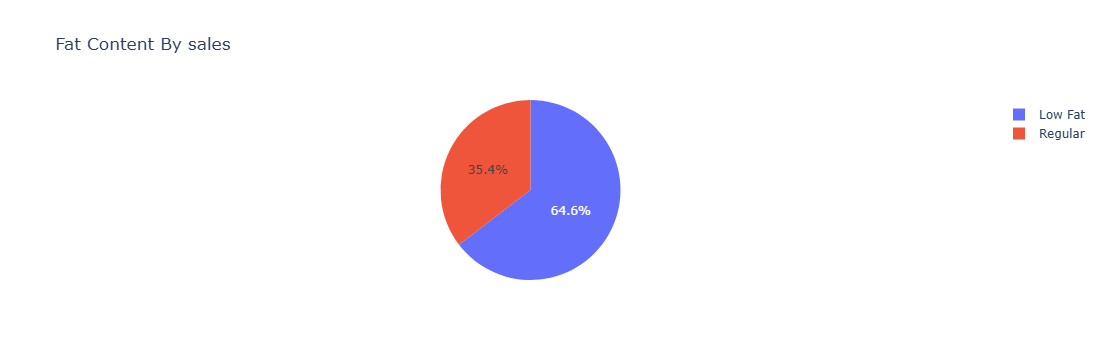

In [76]:
px.pie(Sales_fat,names="Item Fat Content",values="Sales",title="Fat Content By sales")

In [81]:
#Sales by Item Type
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [86]:
Item_type=df.groupby('Item Type')['Sales'].sum().astype(int).sort_values().reset_index()

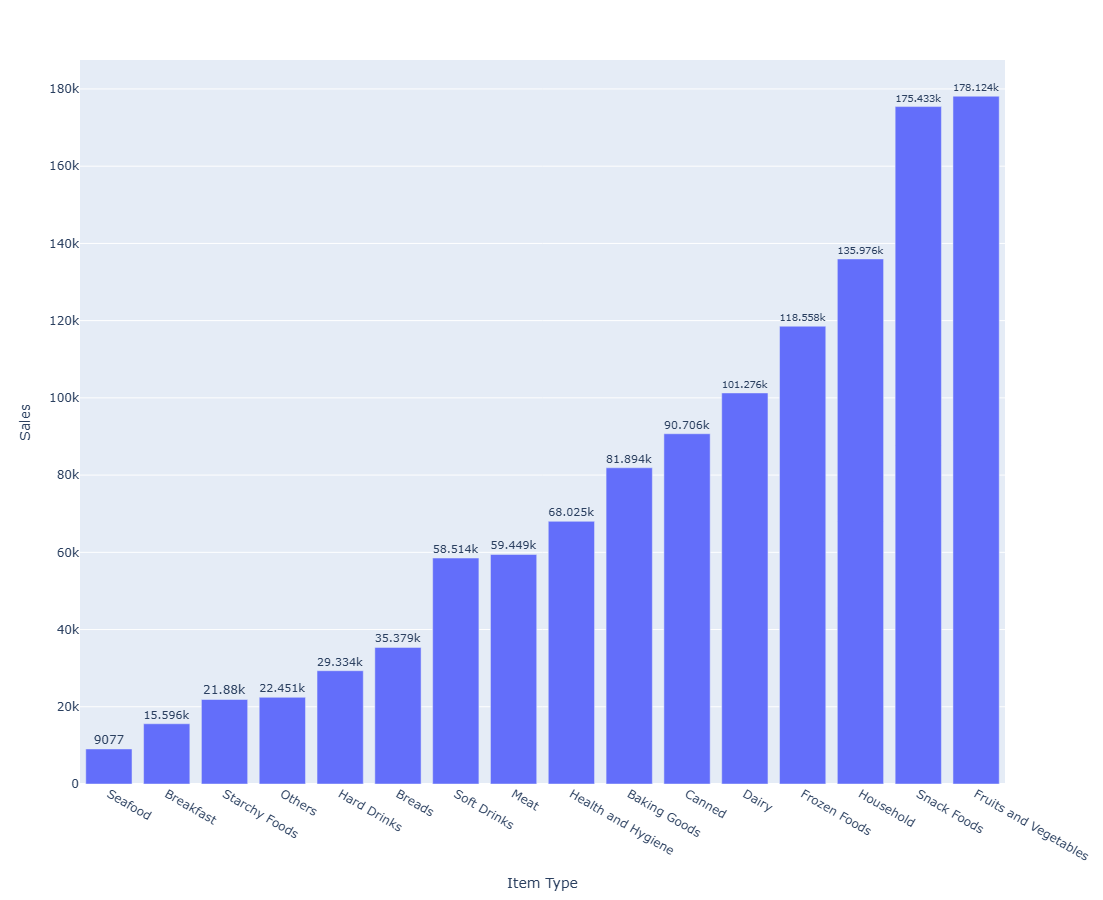

In [106]:

fig=px.bar(Item_type,x='Item Type',y='Sales',text="Sales",text_auto=True,width=1100,height=900)
fig.update_traces( textposition='outside')


In [111]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [112]:
#3. Fat Content by Outlet for Total Sales:


In [121]:
fat_outlet=df.groupby(['Item Fat Content','Outlet Type'])['Sales'].sum().sort_values().reset_index()
print(fat_outlet)


  Item Fat Content        Outlet Type        Sales
0          Regular  Supermarket Type2   46633.1654
1          Regular  Supermarket Type3   46940.2636
2          Regular      Grocery Store   52124.7820
3          Low Fat  Supermarket Type3   83774.4110
4          Low Fat  Supermarket Type2   84844.6070
5          Low Fat      Grocery Store   99814.3650
6          Regular  Supermarket Type1  279663.5914
7          Low Fat  Supermarket Type1  507886.2954


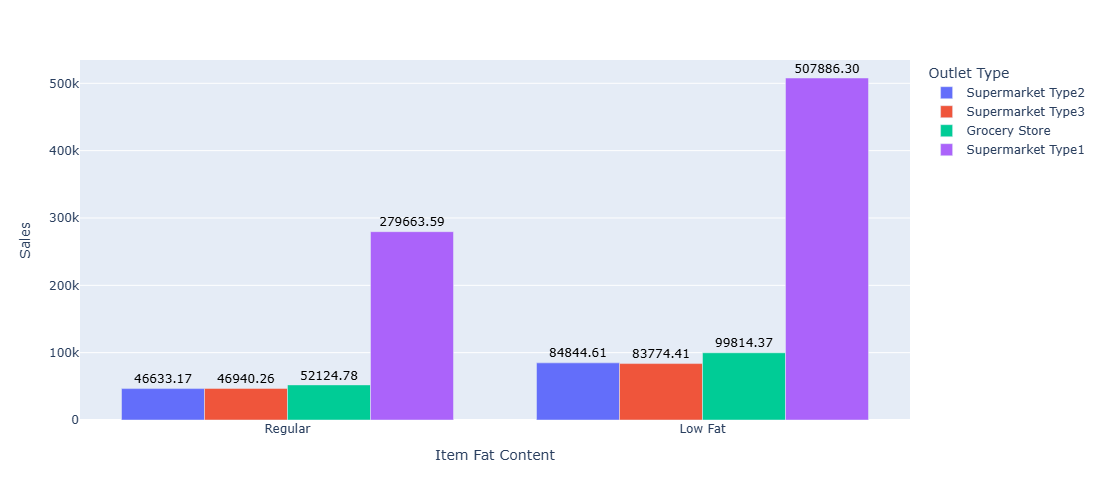

In [141]:
fig1=px.bar(fat_outlet,x="Item Fat Content",y="Sales",color="Outlet Type",barmode="group",text="Sales",height=500)
fig1.update_traces(texttemplate='%{text:.2f}',textposition="outside",textfont=dict(color='black', size=12))

In [143]:
#Total Sales by Outlet Establishment:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [146]:
df["Outlet Establishment Year"]

array([2012, 2022, 2010, 2000, 2015, 2020, 2011, 1998, 2017])

In [156]:
out_year=df.groupby("Outlet Establishment Year")["Sales"].sum().astype(int).sort_index().reset_index()
print(out_year)

   Outlet Establishment Year   Sales
0                       1998  204522
1                       2000  131809
2                       2010  132113
3                       2011   78131
4                       2012  130476
5                       2015  130942
6                       2017  133103
7                       2020  129103
8                       2022  131477


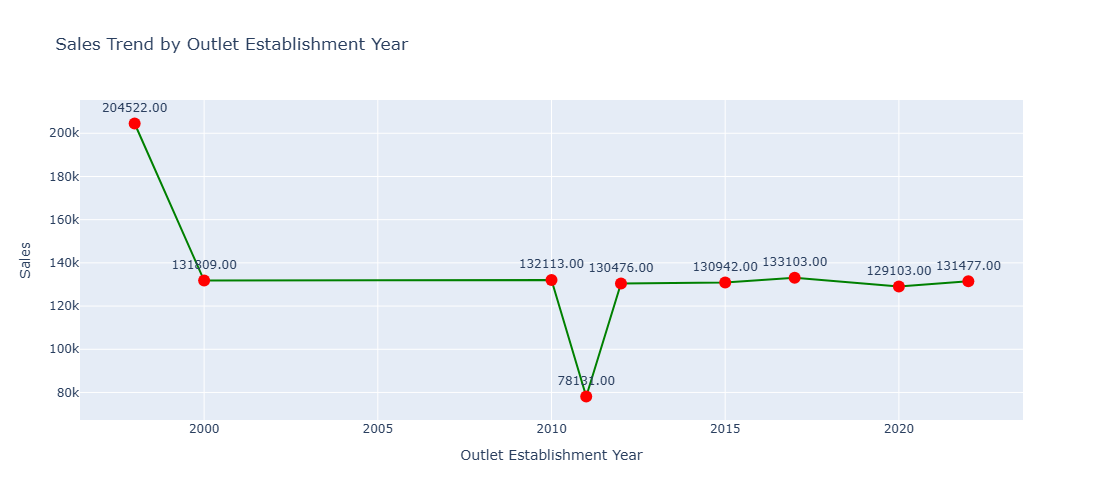

In [177]:
fig2=px.line(out_year, x="Outlet Establishment Year", y="Sales", markers=True,text="Sales",
        title="Sales Trend by Outlet Establishment Year",height=500)
        
fig2.update_traces(line=dict(color="Green"),marker=dict(color="red",size=12),textposition="top center",texttemplate="%{text:.2f}")

In [178]:
#Sales By outlet Size

In [179]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [184]:
salesy_by_size=df.groupby('Outlet Size')['Sales'].sum().reset_index()

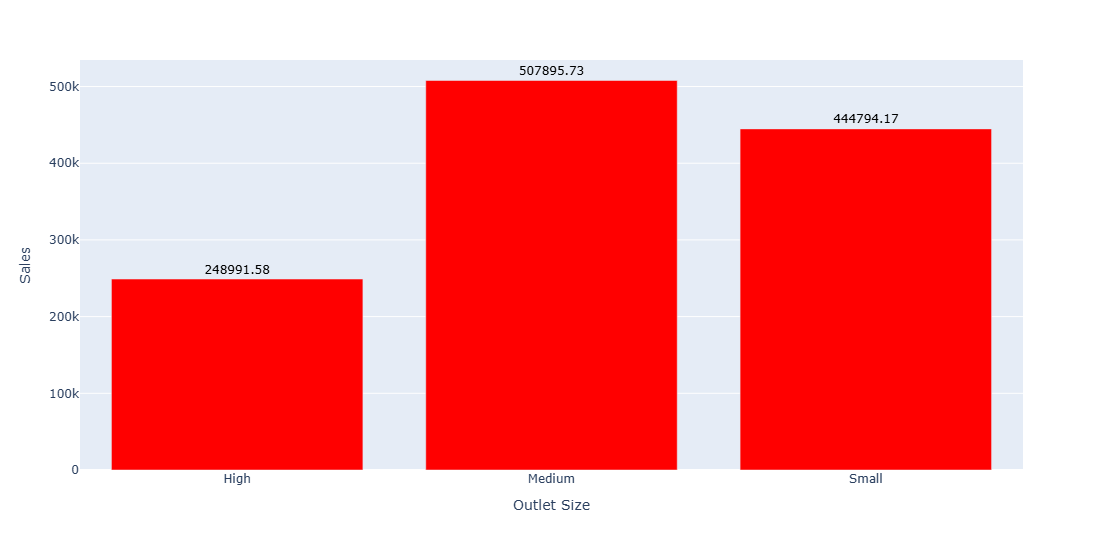

In [200]:
fig3=px.bar(salesy_by_size,x='Outlet Size',y='Sales',text="Sales",height=550)
fig3.update_traces(marker_color="red",textposition="outside",textfont=dict(color="Black",size=12),texttemplate="%{text:.2f}")

In [201]:
#Sales by Outlet Location:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [203]:
df["Outlet Location Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [206]:
out_location=df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
print(out_location)

  Outlet Location Type        Sales
0               Tier 1  336397.8120
1               Tier 2  393150.6416
2               Tier 3  472133.0272


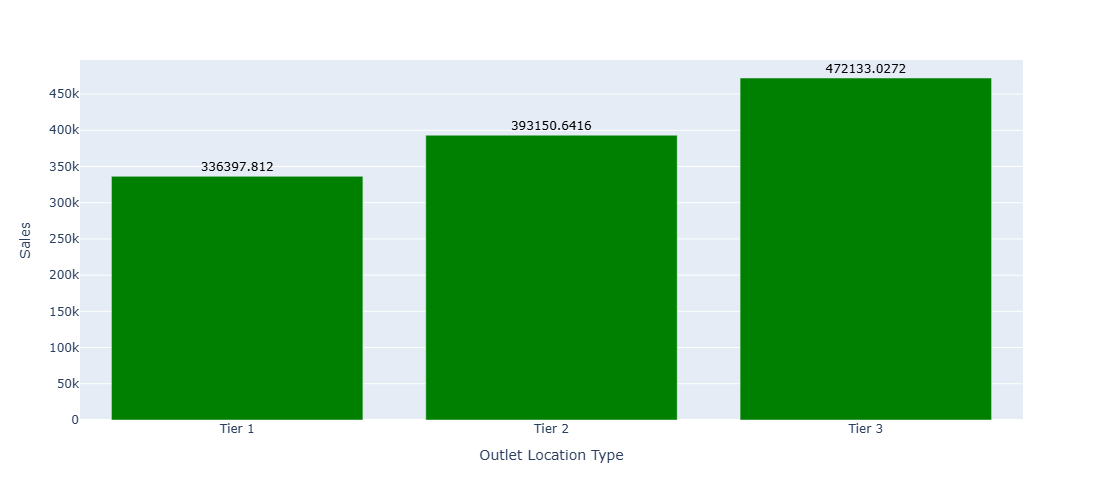

In [218]:
fig4=px.bar(out_location,x="Outlet Location Type",y="Sales",text="Sales",height=500)
fig4.update_traces(textposition="outside",textfont=dict(color="black",size=12),marker_color="green")